In [7]:
%%bash
cd /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/
ls *_gprofiler_output.txt

A2_gprofiler_output.txt
C2_gprofiler_output.txt
C3_gprofiler_output.txt
chr11_4930_5_gprofiler_output.txt
chr2_3760_8_gprofiler_output.txt
chr4_2792_8_gprofiler_output.txt
chr5_916_25_gprofiler_output.txt
D1_gprofiler_output.txt
D3_gprofiler_output.txt
E1_gprofiler_output.txt
E2_gprofiler_output.txt
E3_gprofiler_output.txt
F1_gprofiler_output.txt
F2_gprofiler_output.txt
F3_gprofiler_output.txt
G1_gprofiler_output.txt
G2_gprofiler_output.txt
H2_gprofiler_output.txt


In [8]:
!head /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/A2_gprofiler_output.txt

	source	native	name	p_value	significant	description	term_size	query_size	intersection_size	effective_domain_size	precision	recall	query	parents
0	GO:CC	GO:0005829	cytosol	1.0375873698174732e-19	True	"""The part of the cytoplasm that does not contain organelles but which does contain other particulate matter, such as protein complexes."" [GOC:hjd, GOC:jl]"	5086	1005	409	18842	0.40696517412935324	0.08041683051513959	query_1	['GO:0044444']
1	GO:CC	GO:0005737	cytoplasm	5.777102683682558e-18	True	"""All of the contents of a cell excluding the plasma membrane and nucleus, but including other subcellular structures."" [ISBN:0198547684]"	11620	1007	756	18842	0.7507447864945382	0.06506024096385542	query_1	['GO:0044424']
2	GO:CC	GO:0044444	cytoplasmic part	3.311727587402582e-16	True	"""Any constituent part of the cytoplasm, all of the contents of a cell excluding the plasma membrane and nucleus, but including other subcellular structures."" [GOC:jl]"	9760	1010	658	18842	0.6514851485148515	0.0674

In [124]:
%%bash
wc -l /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/*_gprofiler_output.txt

    670 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/A2_gprofiler_output.txt
    592 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/C2_gprofiler_output.txt
   1046 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/C3_gprofiler_output.txt
   1576 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/chr11_4930_5_gprofiler_output.txt
   1404 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/chr2_3760_8_gprofiler_output.txt
    234 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/chr4_2792_8_gprofiler_output.txt
     16 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/chr5_916_25_gprofiler_output.txt
   1037 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/D1_gprofiler_output.txt
    193 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/D3_gprofiler_output.txt
    834 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/E1_gprofiler_output.txt
    393 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/E2_gprofiler_output.txt
   1745 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/E3_gprofiler_ou

In [17]:
%%bash
head -n 1 /data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler/A2_gprofiler_output.txt

	source	native	name	p_value	significant	description	term_size	query_size	intersection_size	effective_domain_size	precision	recall	query	parents


### Create a unionset of GO terms along with their p-values from the gProfiler results of 18 bulk RNA-seq experiments

In [68]:
import pandas as pd
import glob
import numpy as np

data_dir = '/data/gersbachlab/tsk10/wgCERES/rnaseq_gprofiler'
files = [f for f in glob.glob(data_dir + '/' + '*' + '_gprofiler_output.txt')]

def column_names(f):
    return ' '.join(f.split('/')[-1].split('_')[:1])

columns = []
for i in range(len(files)):
    columns.append(column_names(files[i]))
    
df = None
for file in files:
    df_tmp = pd.read_csv(file, sep='\t')
    df_tmp = df_tmp[df_tmp['significant'] == True]
    df_tmp['-log_pval'] = -np.log10(df_tmp['p_value'])
    df_tmp.drop(columns = ['Unnamed: 0','p_value','significant','term_size','query_size','description','intersection_size','effective_domain_size','precision','recall','query','parents'], inplace=True)
    #df_tmp = df_tmp[['source', 'native','p_value']]
    df_tmp.columns = df_tmp.columns[:-1].tolist() + [column_names(file)]
    if df is None:
        df = df_tmp
    else:
        df = df.merge(df_tmp, how='outer', on=['source','native','name'])
    
df = df.fillna(0)
df = df.sort_values(columns, ascending=False)
df.rename(columns = {'native': 'GO_id'}, inplace=True)
df.to_csv('/data/reddylab/Revathy/dev/Tyler/rnaseq_gProfiler_output_combined_GOterm_pvalue.txt', sep='\t')


In [69]:
df.head(15)

,source,GO_id,name,D1,chr4,F2,E1,E2,A2,chr2,...,chr5,E3,G1,H2,F3,D3,C2,F1,G2,C3
0,TF,TF:M00932,Factor: Sp1; motif: NNGGGGCGGGGNN,41.215400,7.312293,10.586769,14.752272,5.397953,11.173510,61.177032,...,0.0,24.166491,104.639702,19.044704,26.788110,2.587275,3.139708,47.107420,8.201969,30.448123
1,TF,TF:M00932_0,Factor: Sp1; motif: NNGGGGCGGGGNN; match class: 0,41.215400,7.312293,10.586769,14.752272,5.397953,11.173510,61.177032,...,0.0,24.166491,104.639702,19.044704,26.788110,2.587275,3.139708,47.107420,8.201969,30.448123
2,TF,TF:M07395_0,Factor: Sp1; motif: NGGGGCGGGGN; match class: 0,39.485532,10.303558,10.967198,15.687420,5.176104,13.812036,73.349249,...,0.0,25.644345,113.722685,19.631536,31.608368,2.653920,4.568139,49.619926,9.148789,31.879237
3,TF,TF:M07395,Factor: Sp1; motif: NGGGGCGGGGN,39.485532,10.303558,10.967198,15.687420,5.176104,13.812036,73.349249,...,0.0,25.644345,113.722685,19.631536,31.608368,2.653920,4.568139,49.619926,9.148789,31.879237
4,TF,TF:M00196,Factor: Sp1; motif: NGGGGGCGGGGYN,38.762928,9.386362,11.000639,14.759230,5.500014,11.626966,73.429183,...,0.0,24.409962,114.031648,19.422364,28.665199,2.639697,2.502266,50.081397,9.352515,32.375143
5,TF,TF:M00196_0,Factor: Sp1; motif: NGGGGGCGGGGYN; match class: 0,38.762928,9.386362,11.000639,14.759230,5.500014,11.626966,73.429183,...,0.0,24.409962,114.031648,19.422364,28.665199,2.639697,2.502266,50.081397,9.352515,32.375143
6,TF,TF:M00931,Factor: Sp1; motif: GGGGCGGGGC,38.153077,8.269142,9.773014,15.135964,5.291845,10.369915,63.009160,...,0.0,22.116759,105.249190,18.771481,25.841497,2.510197,3.800906,47.670586,8.601952,28.472498
7,TF,TF:M00931_0,Factor: Sp1; motif: GGGGCGGGGC; match class: 0,38.153077,8.269142,9.773014,15.135964,5.291845,10.369915,63.009160,...,0.0,22.116759,105.249190,18.771481,25.841497,2.510197,3.800906,47.670586,8.601952,28.472498
8,TF,TF:M02089,Factor: E2F-3; motif: GGCGGGN,37.201448,11.187711,12.075673,18.990852,9.074090,11.285702,71.797160,...,0.0,20.418413,106.309161,22.979432,28.892252,0.000000,3.768454,50.254939,8.793226,30.990239
9,TF,TF:M02089_0,Factor: E2F-3; motif: GGCGGGN; match class: 0,37.201448,11.187711,12.075673,18.990852,9.074090,11.285702,71.797160,...,0.0,20.418413,106.309161,22.979432,28.892252,0.000000,3.768454,50.254939,8.793226,30.990239


In [112]:
## top 15 GO terms with BP based on their -log10 pvalue enrichment for all 18 files
unionset = df[df['source'] == 'GO:BP'].sort_values(columns, ascending=False)
top15_heatmap = df[df['source'] == 'GO:BP'].sort_values(columns, ascending=False).head(15)
top15_heatmap = top15_heatmap.drop(columns = ['source','GO_id'])
top15_heatmap = top15_heatmap.set_index('name')

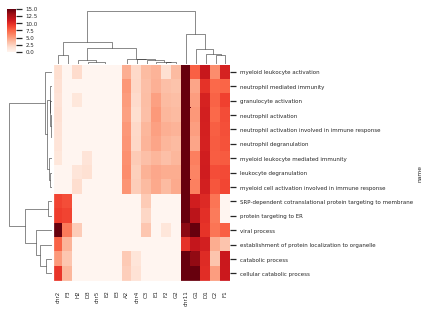

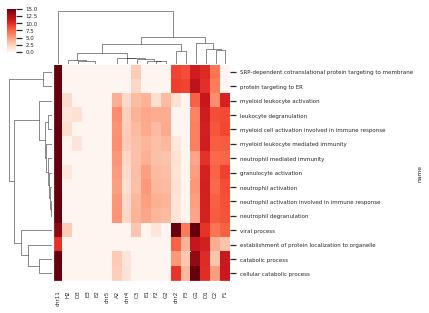

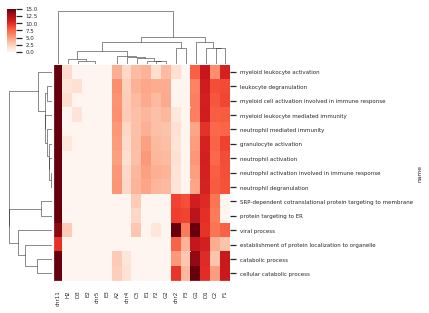

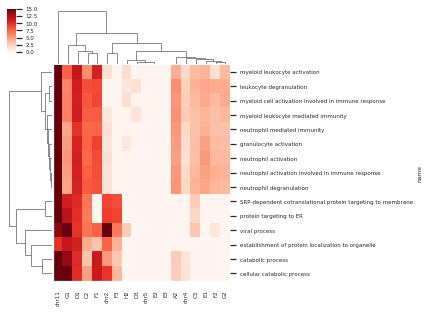

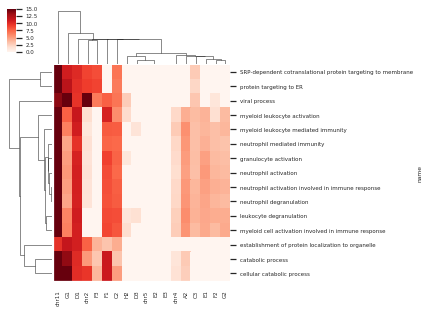

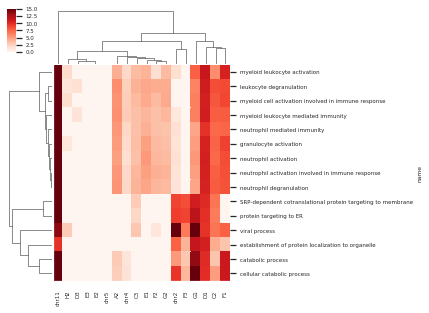

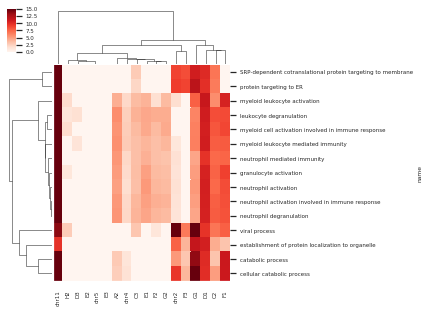

In [116]:
## heatmap for the 15 GO terms
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=0.5)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 5

methods = ['ward','average','median','complete','single','weighted','centroid']
for method in methods:
    sns.clustermap(top15_heatmap.iloc[:,0:18], 
                   method=method, 
                   yticklabels=True, xticklabels=1,
                   cmap='Reds',
                   figsize=(4,5),
                   vmin=0, vmax=15)

    plt.gcf().get_axes()[2].set_ylim(top15_heatmap.shape[0]-0.01, -0.01)
    sns.despine()
    #plt.title('Heatmap with %s distance'% method)
    #plt.savefig('/data/reddylab/Revathy/dev/Tyler/rnaseq_gProfiler_negLogpval_GOterms_filtered_%smethod.pdf'% (method),bbox_inches='tight')
    plt.show()

In [132]:
## top 15 GO terms with BP based on their -log10 pvalue enrichment for all 18 files


top15 = None
for column in columns:
    tmp_df = unionset[['GO_id','name',column]].sort_values(column,ascending=False).head(15)
    if top15 is None:
        top15 = tmp_df
    else:
        top15 = top15.merge(tmp_df, how='outer', on=['GO_id','name'])

top15 = top15.drop(columns = 'GO_id')
top15 = top15.set_index('name')
#top15['Count'] = top15.apply(lambda x: x.count(), axis=1)
top15 = top15.fillna(0)
top15.head(5)

,D1,chr4,F2,E1,E2,A2,chr2,chr11,chr5,E3,G1,H2,F3,D3,C2,F1,G2,C3
name,,,,,,,,,,,,,,,,,,
myeloid leukocyte activation,11.463197,2.260681,0.000000,0.000000,0.0,0.000000,0.0,20.103981,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
leukocyte degranulation,11.069871,2.752038,4.432117,0.000000,0.0,5.872774,0.0,16.811926,0.0,0.0,0.0,0.0,0.0,0.0,8.653169,0.0,4.421996,0.0
myeloid leukocyte mediated immunity,10.957521,2.969022,3.556227,0.000000,0.0,5.692463,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,8.019479,0.0,3.940488,0.0
neutrophil activation,10.887548,0.000000,3.946615,5.277512,0.0,4.992728,0.0,17.132462,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
myeloid cell activation involved in immune response,10.884463,2.819791,3.758610,0.000000,0.0,5.530606,0.0,17.292837,0.0,0.0,0.0,0.0,0.0,0.0,8.276406,0.0,4.530348,0.0


In [129]:
filter_top15 = top15[top15[columns] > 3]
filter_top15['count'] = filter_top15.apply(lambda x: x.count(), axis=1)
filter_top15_reduced = filter_top15[filter_top15['count'] >= 2] 
filter_top15_reduced = filter_top15_reduced.fillna(0)
filter_top15_reduced_normalized = filter_top15_reduced.apply(lambda x: x/x.max(), axis=1)
filter_top15_reduced_normalized.head(5)

,D1,chr4,F2,E1,E2,A2,chr2,chr11,chr5,E3,G1,H2,F3,D3,C2,F1,G2,C3,count
name,,,,,,,,,,,,,,,,,,,
myeloid leukocyte activation,0.570195,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.099483
leukocyte degranulation,0.658453,0.0,0.263629,0.000000,0.0,0.349322,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514704,0.0,0.263027,0.0,0.356890
myeloid leukocyte mediated immunity,1.000000,0.0,0.324547,0.000000,0.0,0.519503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.731870,0.0,0.359615,0.0,0.456308
neutrophil activation,0.635492,0.0,0.230359,0.308042,0.0,0.291419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.291844
myeloid cell activation involved in immune response,0.629420,0.0,0.217351,0.000000,0.0,0.319821,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.478603,0.0,0.261978,0.0,0.346964


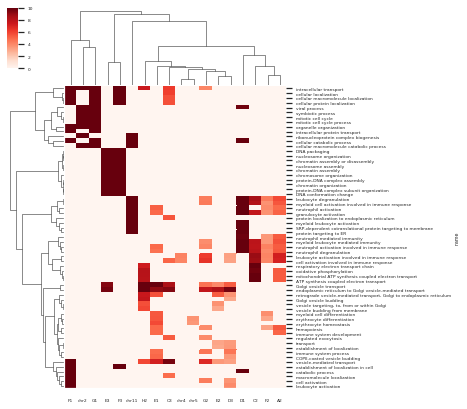

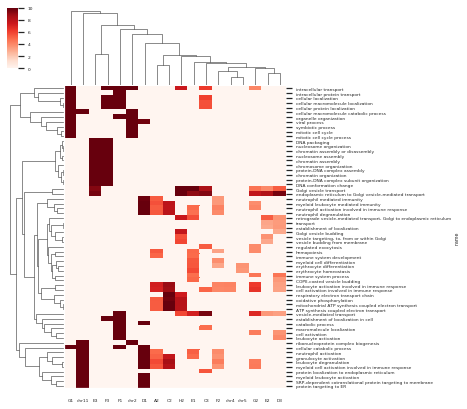

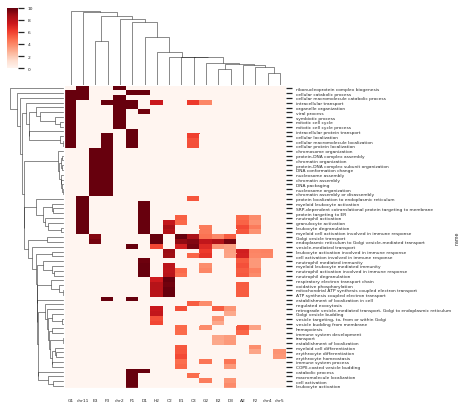

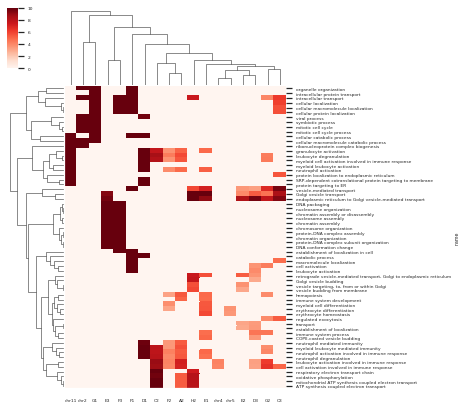

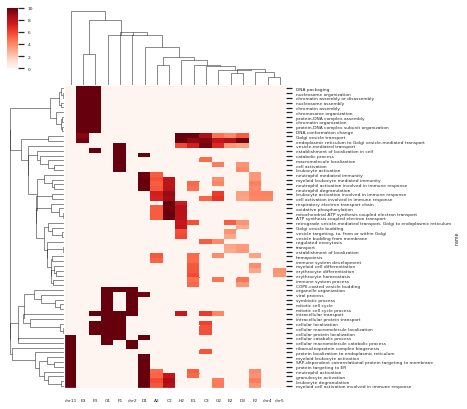

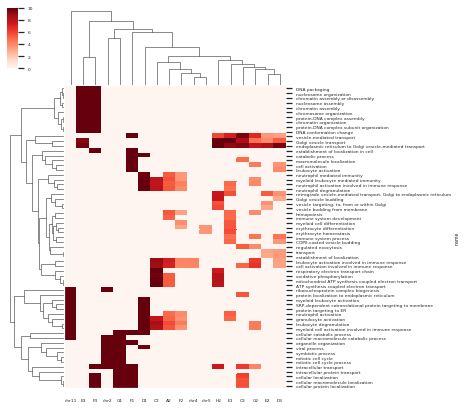

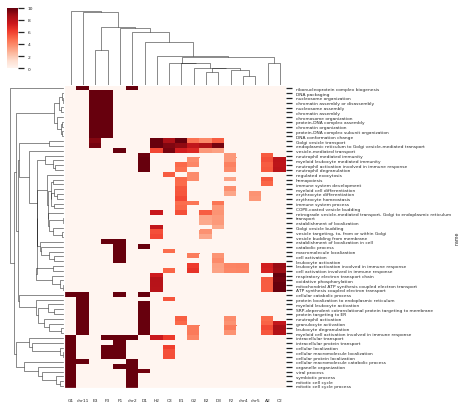

In [111]:
## heatmap for the 15 GO terms
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=0.4)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 5

methods = ['ward','average','single','complete','median','weighted','centroid']
for method in methods:
    sns.clustermap(filter_top15_reduced.iloc[:,0:18], 
                   method=method, 
                   yticklabels=True, xticklabels=1,
                   cmap='Reds',
                   figsize=(5,7),
                   vmin=0, vmax=10)

    plt.gcf().get_axes()[2].set_ylim(filter_top15_reduced.shape[0]-0.01, -0.01)
    sns.despine()
    #plt.title('Heatmap with %s distance'% method)
    #plt.savefig('/data/reddylab/Revathy/dev/Tyler/rnaseq_gProfiler_negLogpval_GOterms_filtered_%smethod.pdf'% (method),bbox_inches='tight')
    plt.show()

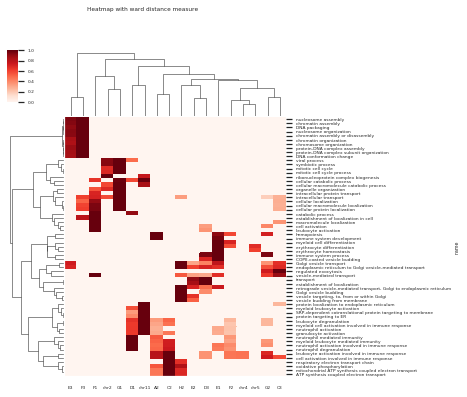

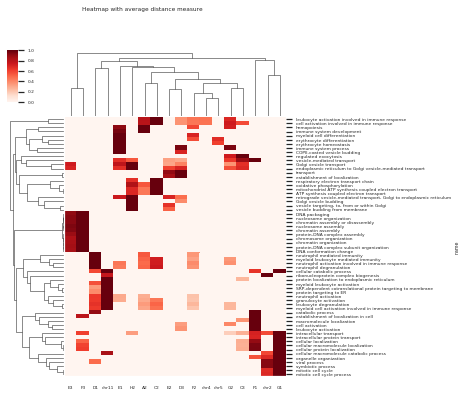

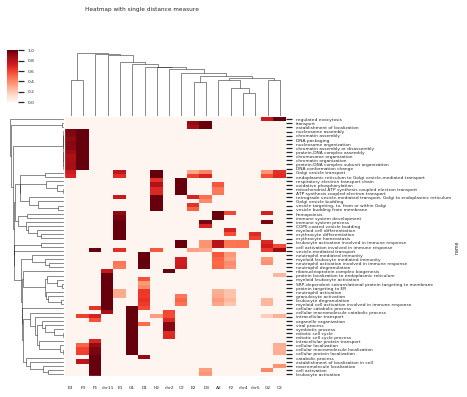

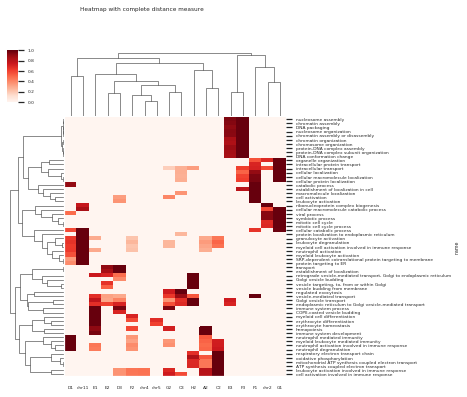

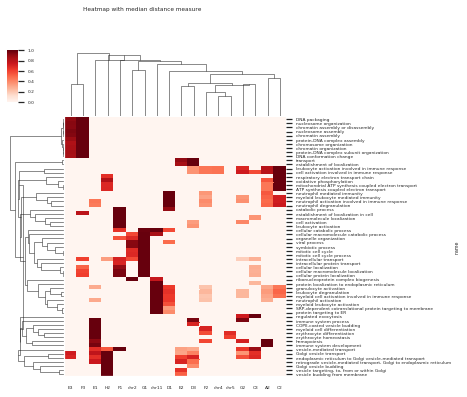

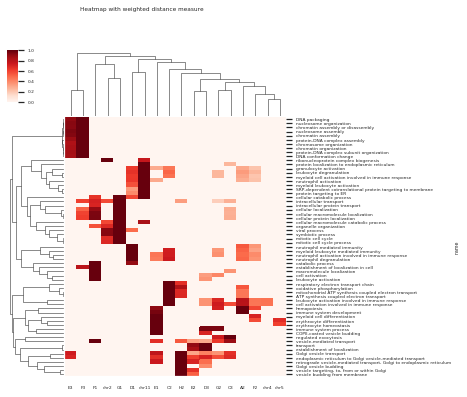

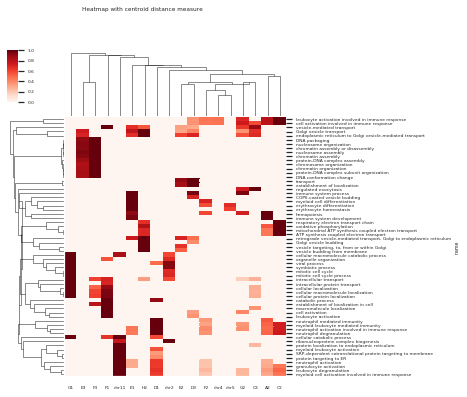

In [138]:
## heatmap for the 15 GO terms
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=0.4)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 5

methods = ['ward','average','single','complete','median','weighted','centroid']
for method in methods:
    sns.clustermap(filter_top15_reduced_normalized.iloc[:,0:18], 
                   method=method, 
                   yticklabels=True, xticklabels=1,
                   cmap='Reds',
                   figsize=(5,6),
                   vmin=0, vmax=1).fig.suptitle('Heatmap with %s distance measure'% method) 

    plt.gcf().get_axes()[2].set_ylim(filter_top15_reduced_normalized.shape[0]-0.01, -0.01)
    sns.despine()
    #plt.title('Heatmap with %s distance'% method)
    plt.savefig('/data/reddylab/Revathy/dev/Tyler/rnaseq_gProfiler_negLogpval_GOterms_filtered_normalized_%smethod.pdf'% (method),bbox_inches='tight')
    plt.show()

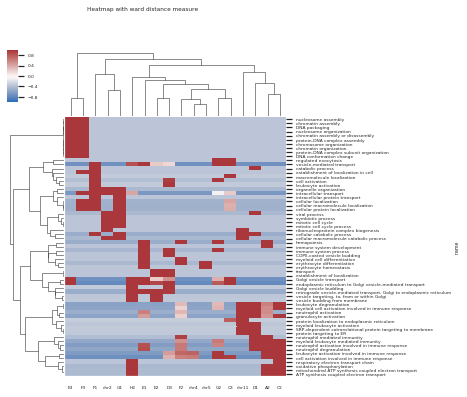

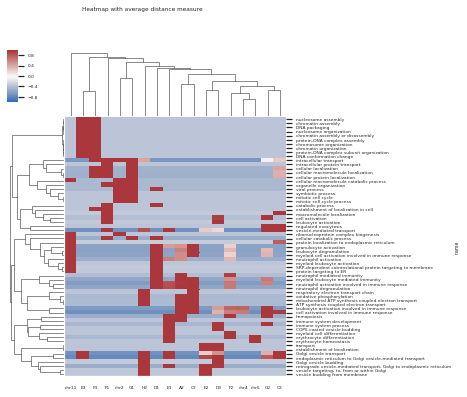

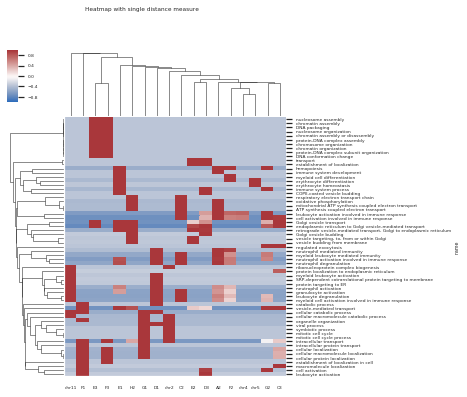

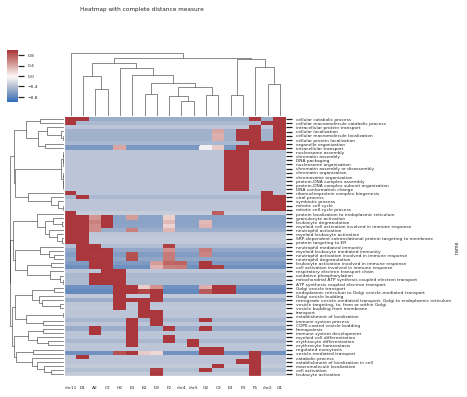

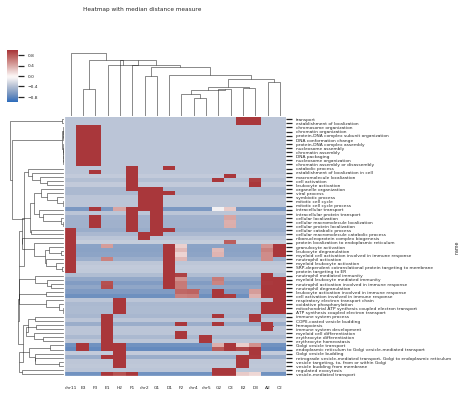

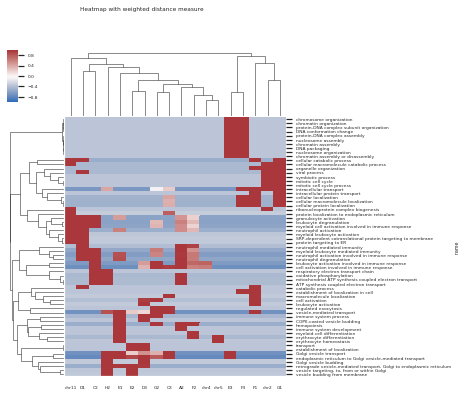

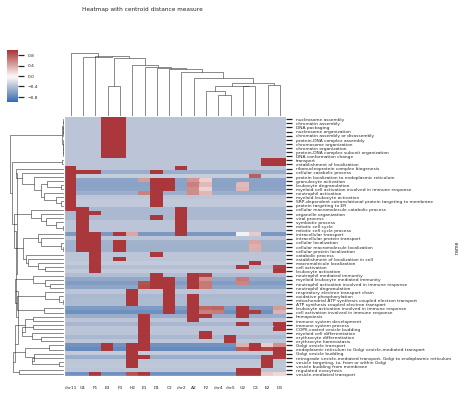

In [145]:
## heatmap for the 15 GO terms
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=0.4)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 5

methods = ['ward','average','single','complete','median','weighted','centroid']
for method in methods:
    sns.clustermap(filter_top15_reduced_normalized.iloc[:,0:18], 
                   method=method, 
                   z_score=0,
                   yticklabels=True, xticklabels=1,
                   cmap='vlag',
                   figsize=(5,6),
                   vmin=-1, vmax=1).fig.suptitle('Heatmap with %s distance measure'% method) 

    plt.gcf().get_axes()[2].set_ylim(filter_top15_reduced_normalized.shape[0]-0.01, -0.01)
    sns.despine()
    #plt.title('Heatmap with %s distance'% method)
    plt.savefig('/data/reddylab/Revathy/dev/Tyler/rnaseq_gProfiler_negLogpval_GOterms_filtered_zscore_normalized_%smethod.pdf'% (method),bbox_inches='tight')
    plt.show()

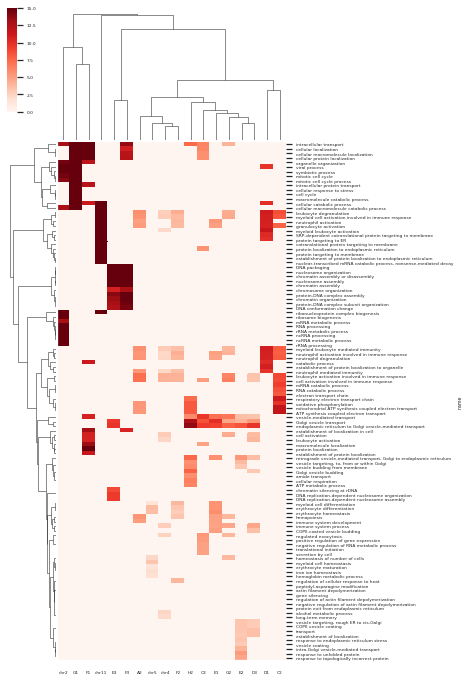

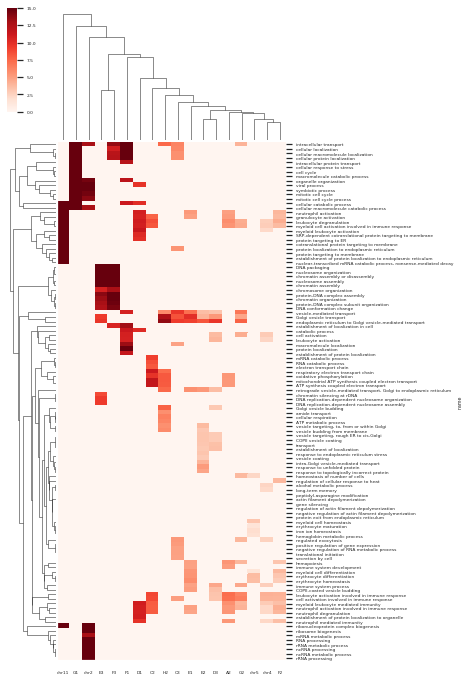

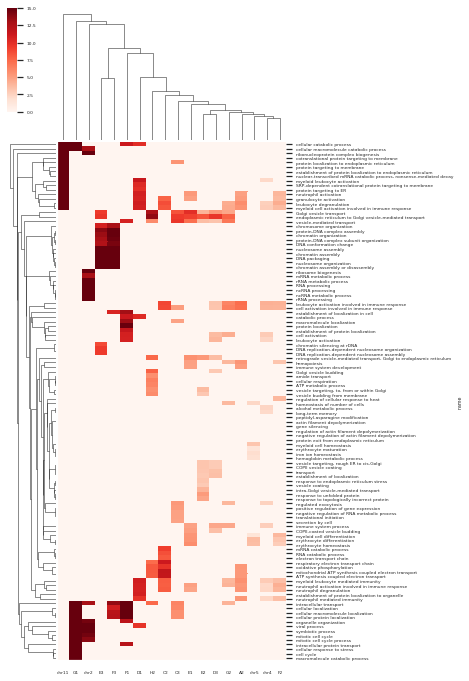

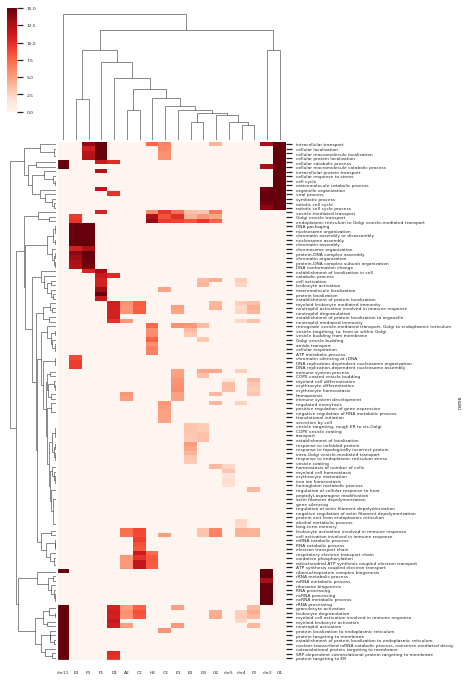

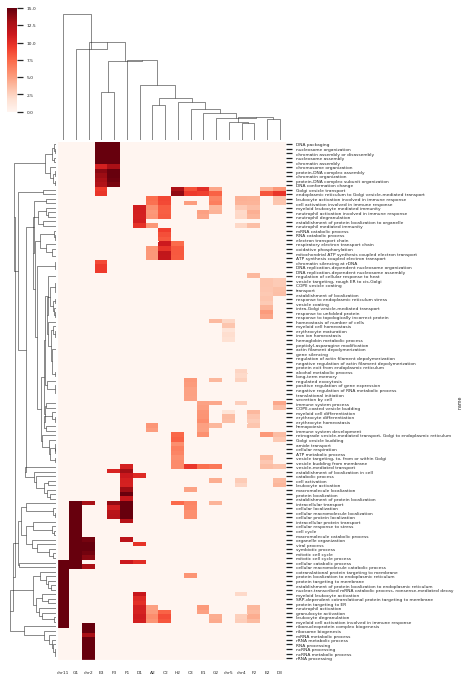

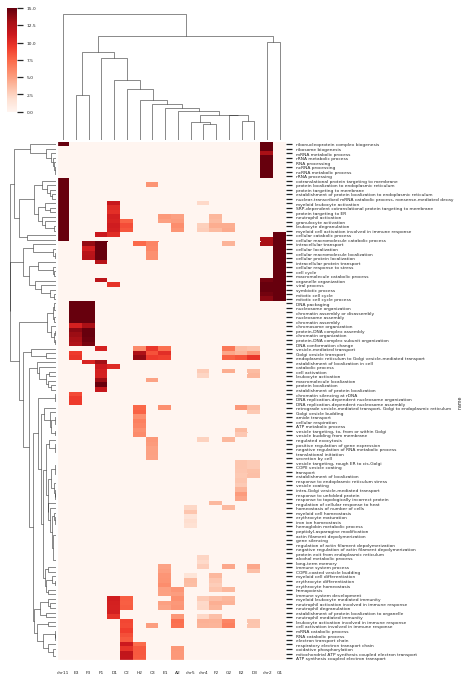

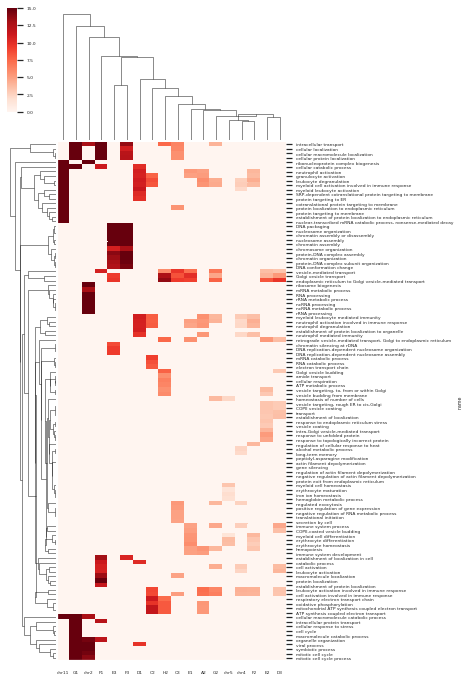

In [107]:
## heatmap for the 15 GO terms
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=0.4)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 5

methods = ['ward','average','single','complete','median','weighted','centroid']
for method in methods:
    sns.clustermap(top15.iloc[:,0:18], 
                   method=method, 
                   yticklabels=True, xticklabels=1,
                   cmap='Reds',
                   figsize=(5,12),
                   vmin=0, vmax=15)

    plt.gcf().get_axes()[2].set_ylim(top15.shape[0]-0.01, -0.01)
    sns.despine()
    #plt.title('Heatmap with %s distance'% method)
    plt.savefig('/data/reddylab/Revathy/dev/Tyler/rnaseq_gProfiler_negLogpval_GOterms_%smethod.pdf'% (method),bbox_inches='tight')
    plt.show()

Create a table with list of gene symbols associated with a sig. link in the sc-RNA-seq screen results and their associated GO terms. 
Binarize it in a way where the gene symbols becomes the row names and each column stands for the important GO terms (which has to be determined), where 0 indicates the GO term not present for the gene and 1 indicates GO term present for the gene. 
gProfiler web interface was used for the set of gene symbols and the gProfiler output is available in **/data/reddylab/Revathy/dev/Tyler/gProfiler_output.txt**

In [6]:
!head -n 1 /data/reddylab/Revathy/dev/Tyler/gProfiler_output.txt

In [4]:
import pandas as pd

## define a function to reverse a dictionary key-value pairs
def invert_dict(d): 
    inverse = dict() 
    for key in d: 
        # Go through the list that is saved in the dict:
        for item in d[key]:
            # Check if in the inverted dict the key exists
            if item not in inverse: 
                # If not create a new list
                inverse[item] = [key] 
            else: 
                inverse[item].append(key) 
    return inverse

## input the gProfiler output and subset the required columns to be converted into a dictionary
gprof = pd.read_csv('/data/reddylab/Revathy/dev/Tyler/gProfiler_output.txt', sep='\t')
dict_df = gprof[['term_name','intersections']]

dict_df['intersections'] = dict_df['intersections'].str.strip('').str.split(',') ##converting the intersections columns from str to list
dict_df.rename(columns = {'term_name':'GOTerm'}, inplace=True)

## convert the df into a dict with GO terms as keys and the list of genes associated with each of them as their value
gene_dict = dict(zip(dict_df.GOTerm, dict_df.intersections.tolist()))


## reverse the created dictionary with each Gene as the key and the corresponding GO terms as the values
reverse_dict = invert_dict(gene_dict)


## create a table of all GO terms and their counts (how many times each of it is repeated for the set of genes) - to 
## identify which are the most expressed GO terms

GOterm_list = []
for key in gene_dict:
    GOterm_list.append(key)

combined_list = sum(reverse_dict.values(), [])

count = []
for i in range(0,len(GOterm_list)):
    count.append(combined_list.count(GOterm_list[i])) 

GOterm_count = pd.DataFrame({'term_name': GOterm_list,'Count': count})
GOterm_count = GOterm_count.sort_values(['Count'], ascending=False)
GOterm_count.to_csv('/data/reddylab/Revathy/dev/Tyler/gProfiler_GOterm_occurence_count.txt', sep='\t')

/data/itlab/jupyterhub/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [261]:
GOterm_count.shape

(562, 2)

In [5]:
import pandas as pd

#gprof = pd.read_csv('/data/reddylab/Revathy/dev/Tyler/gProfiler_output.txt', sep='\t')
#GOterm_count = pd.read_csv('/data/reddylab/Revathy/dev/Tyler/gProfiler_GOterm_occurence_count.txt', sep='\t')
GO_table = GOterm_count.merge(gprof, on='term_name', how='inner')
GO_table.drop(columns = ['adjusted_p_value','term_size','query_size','intersection_size','effective_domain_size','intersections'], inplace=True)
GO_table.rename(columns = {'term_id': 'GO_id'}, inplace=True)
GO_table

,term_name,Count,source,GO_id,negative_log10_of_adjusted_p_value
0,Factor: CPBP; motif: SNCCCNN; match class: 1,745,TF,TF:M01822_1,6.245050
1,Factor: TR4; motif: ACCCCGS,733,TF,TF:M04934,6.525238
2,Factor: p300; motif: ACNTCCG,726,TF,TF:M04826,6.699377
3,Factor: E2F-1:HES-7; motif: GGCRCGTGSYNNWNGGCGCSM,723,TF,TF:M08525,14.759558
4,Factor: E2F-3:HES-7; motif: NNNSGCGCSNNNNNCRCG...,719,TF,TF:M08526,15.225088
...,...,...,...,...,...
570,Pathways in clear cell renal cell carcinoma,12,WP,WP:WP4018,1.327103
571,hsa-miR-6762-3p,11,MIRNA,MIRNA:hsa-miR-6762-3p,2.309548
572,hsa-miR-184,11,MIRNA,MIRNA:hsa-miR-184,1.878404
573,Signaling by Leptin,5,REAC,REAC:R-HSA-2586552,2.162076


In [ ]:
unionset.merge()

In [6]:
gprof.head(5)

,source,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections
0,GO:MF,transcription factor binding,GO:0008134,0.000002,5.640677,705,722,61,18694,"ADD1,ARHGEF2,ARID1A,BBS1,CNOT1,COMMD7,CREBBP,D..."
1,GO:MF,DNA-binding transcription factor binding,GO:0140297,0.000297,3.527074,404,722,38,18694,"ARID1A,BBS1,CNOT1,COMMD7,CREBBP,DDRGK1,FAM220A..."
2,GO:MF,protein binding,GO:0005515,0.008540,2.068552,14752,722,614,18694,"AASDH,ABCB9,ABI1,ACAD9,ACAP3,ACLY,ACOT11,ACVR2..."
3,GO:MF,RNA polymerase II-specific DNA-binding transcr...,GO:0061629,0.011460,1.940831,284,722,27,18694,"ARID1A,BBS1,CNOT1,COMMD7,CREBBP,DDRGK1,FAM220A..."
4,GO:MF,ion binding,GO:0043167,0.035317,1.452020,6055,722,283,18694,"AASDH,ABCA7,ABCB9,ACAD9,ACAP3,ACER3,ACLY,ACVR2..."


In [13]:
df_merge = df.merge(GO_table, on=['GO_id'], how='inner')
df_merge[df_merge['source_x'] == 'GO:BP']


,source_x,GO_id,name,D1,chr4_2792_8,F2,E1,E2,A2,chr2_3760_8,...,F3,D3,C2,F1,G2,C3,term_name,Count,source_y,negative_log10_of_adjusted_p_value
254,GO:BP,GO:0006996,organelle organization,4.478251,1.0,1.0,2.847648,1.0,3.002255,14.548754,...,9.873451,1.0,1.584737,11.977294,1.0,4.614893,organelle organization,206,GO:BP,1.559361
276,GO:BP,GO:1901564,organonitrogen compound metabolic process,2.951029,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.0,2.614613,organonitrogen compound metabolic process,317,GO:BP,1.887343
287,GO:BP,GO:0044237,cellular metabolic process,2.314092,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.0,1.986563,cellular metabolic process,484,GO:BP,3.819060
296,GO:BP,GO:1901360,organic cyclic compound metabolic process,1.687090,1.0,1.0,1.000000,1.0,1.000000,3.882915,...,1.461296,1.0,1.000000,1.000000,1.0,2.389181,organic cyclic compound metabolic process,301,GO:BP,2.968462
310,GO:BP,GO:0051276,chromosome organization,1.000000,1.0,1.0,1.000000,1.0,1.000000,6.622889,...,12.865084,1.0,1.000000,1.000000,1.0,1.000000,chromosome organization,85,GO:BP,3.207731
311,GO:BP,GO:0090304,nucleic acid metabolic process,1.000000,1.0,1.0,1.000000,1.0,1.000000,6.576665,...,1.000000,1.0,1.000000,1.000000,1.0,1.000000,nucleic acid metabolic process,258,GO:BP,2.381440
312,GO:BP,GO:0034641,cellular nitrogen compound metabolic process,1.000000,1.0,1.0,1.000000,1.0,1.000000,6.363487,...,1.343063,1.0,1.000000,1.000000,1.0,1.822124,cellular nitrogen compound metabolic process,313,GO:BP,2.646024
313,GO:BP,GO:0006139,nucleobase-containing compound metabolic process,1.000000,1.0,1.0,1.000000,1.0,1.000000,6.229909,...,1.000000,1.0,1.000000,1.000000,1.0,2.004288,nucleobase-containing compound metabolic process,283,GO:BP,3.030891
314,GO:BP,GO:0046483,heterocycle metabolic process,1.000000,1.0,1.0,1.000000,1.0,1.000000,6.033155,...,1.582171,1.0,1.000000,1.000000,1.0,2.470748,heterocycle metabolic process,292,GO:BP,3.493620
315,GO:BP,GO:0016070,RNA metabolic process,1.000000,1.0,1.0,1.000000,1.0,1.000000,4.687934,...,1.000000,1.0,1.000000,1.000000,1.0,1.953129,RNA metabolic process,234,GO:BP,1.925531


In [88]:
GOterm_count.head(10)

,term_name,Count
265,Factor: CPBP; motif: SNCCCNN; match class: 1,745
254,Factor: TR4; motif: ACCCCGS,733
245,Factor: p300; motif: ACNTCCG,726
90,Factor: E2F-1:HES-7; motif: GGCRCGTGSYNNWNGGCGCSM,723
86,Factor: E2F-3:HES-7; motif: NNNSGCGCSNNNNNCRCG...,719
465,Factor: Pax-4; motif: NNNNNYCACCCB,716
65,Factor: MAZ; motif: GGGMGGGGSSGGGGGGGGGGGG,714
199,Factor: E2F-3:TBR2; motif: ANGTGYKANGGCGCSTTNN...,710
80,Factor: ETF; motif: CCCCGCCCCYN,709
75,Factor: E2F-2; motif: GCGCGCGCNCS,708


In [280]:
GOterm_BP = GO_table[GO_table['source'] == 'GO:BP'].sort_values('negative_log10_of_adjusted_p_value', ascending=False)
GOterm_GO = GO_table[GO_table['source'].str.startswith('GO')].sort_values('negative_log10_of_adjusted_p_value', ascending=False)
top15_BP_df = GOterm_BP.head(15)
top15_GO_df = GOterm_GO.head(15)
top15_BP_df
#GOterm_noMotif.merge(dict_df, on='GOTerm', how='inner')

,term_name,Count,source,GO_id,negative_log10_of_adjusted_p_value
168,nitrogen compound metabolic process,458,GO:BP,GO:0006807,4.473098
138,cellular metabolic process,484,GO:BP,GO:0044237,3.819060
369,heterocycle metabolic process,292,GO:BP,GO:0046483,3.493620
154,primary metabolic process,472,GO:BP,GO:0044238,3.486483
248,cellular macromolecule metabolic process,387,GO:BP,GO:0044260,3.237779
550,chromosome organization,85,GO:BP,GO:0051276,3.207731
368,cellular aromatic compound metabolic process,292,GO:BP,GO:0006725,3.103235
379,nucleobase-containing compound metabolic process,283,GO:BP,GO:0006139,3.030891
353,organic cyclic compound metabolic process,301,GO:BP,GO:1901360,2.968462
451,macromolecule modification,219,GO:BP,GO:0043412,2.899921


In [282]:
GO_table[GO_table['source'] == 'GO:BP'].sort_values('Count', ascending=False).head(15)

,term_name,Count,source,GO_id,negative_log10_of_adjusted_p_value
112,metabolic process,516,GO:BP,GO:0008152,2.095186
131,organic substance metabolic process,495,GO:BP,GO:0071704,2.183057
138,cellular metabolic process,484,GO:BP,GO:0044237,3.819060
154,primary metabolic process,472,GO:BP,GO:0044238,3.486483
168,nitrogen compound metabolic process,458,GO:BP,GO:0006807,4.473098
194,macromolecule metabolic process,439,GO:BP,GO:0043170,2.200613
248,cellular macromolecule metabolic process,387,GO:BP,GO:0044260,3.237779
317,regulation of metabolic process,334,GO:BP,GO:0019222,2.104992
328,cellular component organization or biogenesis,320,GO:BP,GO:0071840,2.453714
332,organonitrogen compound metabolic process,317,GO:BP,GO:1901564,1.887343


Merge SDFO table with the **rnaseq_gProfiler_output_combined_GOterm_pvalue** table (with p-values from 18 RNAseq files) for obtaining those GO terms which are Moderatively Informative, Informative and Highly Informative to create a heatmap with the files as columns and GO terms as rows

In [293]:
import pandas as pd

SDFO = pd.read_csv('/data/reddylab/Revathy/dev/Tyler/SDFO.both.txt', sep='\t')
gProf_combined = pd.read_csv('/data/reddylab/Revathy/dev/Tyler/rnaseq_gProfiler_output_combined_GOterm_pvalue.txt', sep='\t')
SDFO.drop(columns = ['Domain_type'], inplace=True)
SDFO.drop_duplicates(['GO_id'], inplace=True)

SDFO_GO = SDFO.merge(GO_table, on=['GO_id'], how='inner')
SDFO_GO_top = SDFO_GO.loc[(SDFO_GO['SDFO_level'] == 'Moderately Informative') | (SDFO_GO['SDFO_level'] == 'Informative') | (SDFO_GO['SDFO_level'] == 'Highly  Informative')].sort_values(['Count'], ascending=False) 


SDFO_GO_pval = SDFO_GO_top.merge(gProf_combined, how='inner', on=['GO_id','source'])

SDFO_GO_pval_heatmap = SDFO_GO_pval.drop(columns = ['Unnamed: 0','name','GO_id','Count','GO_subontology','SDFO_level','term_name','source'])
SDFO_GO_pval_heatmap = SDFO_GO_pval_heatmap.set_index('GO_name')
SDFO_GO_pval_heatmap.rename(columns = {'negative_log10_of_adjusted_p_value': 'scRNAseq'}, inplace=True)
SDFO_GO_pval_heatmap.head(5)


,scRNAseq,D1,chr4_2792_8,F2,E1,E2,A2,chr2_3760_8,chr11_4930_5,chr5_916_25,E3,G1,H2,F3,D3,C2,F1,G2,C3
GO_name,,,,,,,,,,,,,,,,,,,
protein binding,2.068552,1.850117,1.000000,3.125699,2.711656,1.000000,4.369890,1.000000,1.000000,1.0,2.992019,8.788865,3.796959,5.378198,1.000000,1.343443,9.912279,2.852399,6.759618
intracellular organelle lumen,5.702061,17.095623,1.000000,8.803220,14.033066,2.652563,6.797618,54.491653,43.920987,1.0,16.311438,53.631623,11.151639,25.043740,1.000000,1.938840,27.305581,8.434481,17.656367
nucleic acid metabolic process,2.381440,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.576665,1.000000,1.0,1.000000,6.071966,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
cytosol,1.515154,37.040398,2.932232,6.194051,17.910165,7.118305,18.983975,74.758736,69.947101,1.0,22.948539,85.490088,14.147507,31.206676,2.353054,10.072769,46.411500,6.723693,22.092484
RNA metabolic process,1.925531,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.687934,1.000000,1.0,1.000000,5.874886,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.953129


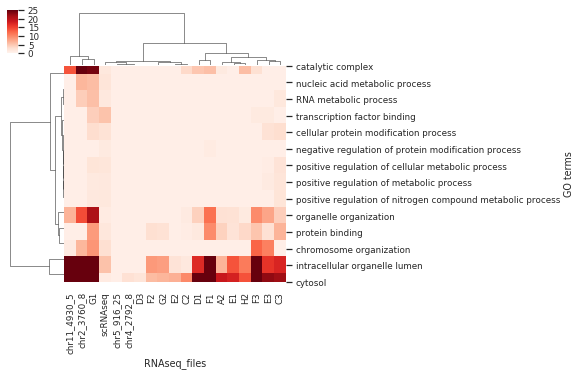

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_context("talk")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 5

sns.set(font_scale=0.8)
g = sns.clustermap(SDFO_GO_pval_heatmap, 
                   method='ward', 
                   figsize=(5,5), 
                   cmap='Reds', 
                   yticklabels=1, xticklabels=1,
                   vmin=0, vmax=25)
g.ax_heatmap.set_xlabel("RNAseq_files")
g.ax_heatmap.set_ylabel("GO terms")
#g.ax_col_dendrogram.legend(loc=9, ncol=7, bbox_to_anchor=(0.26, 0., 0.5, 1.5))

plt.show()
#plt.savefig('/data/reddylab/Revathy/dev/Tyler/RNAseq_GOterms_heatmap.png')
# g.xlabel(ax.get_xlabel(), size=font_sz);
# g.yticks(ax.get_yticks(), size=font_sz);


Merge the SDFO table with the GOTerm_GO table which has the GO terms along with their GO ids from the scRNAseq DEGene list whose GO terms were identified using gProfiler. 

In [87]:
SDFO_GOterm_GO = SDFO.merge(GOterm_GO, on='GO_id', how='inner')
#SDFO_GOterm_GO
SDFO_GO_informative = SDFO_GOterm_GO.loc[(SDFO_GOterm_GO['SDFO_level'] == 'Moderately Informative') | (SDFO_GOterm_GO['SDFO_level'] == 'Informative') | (SDFO_GOterm_GO['SDFO_level'] == 'Highly  Informative')].sort_values(['Count'], ascending=False)
SDFO_GOterm_GO.shape


(32, 6)

Create a bar plot which depicts the GO terms along with their counts (GO terms which are moderately informative, informative and highly informative)

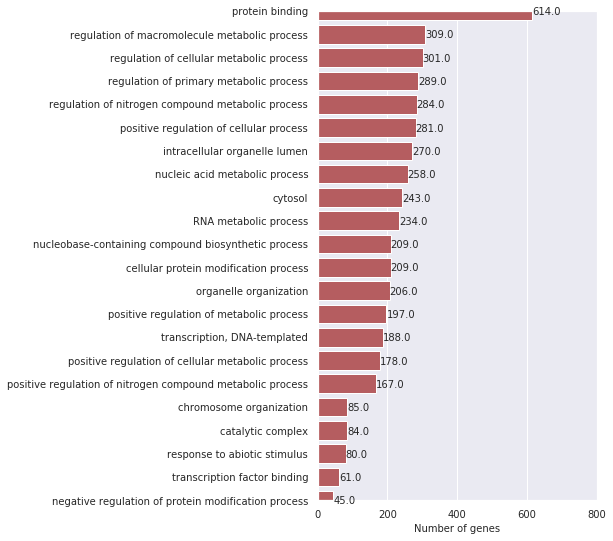

<Figure size 432x288 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (5,9))
plot = sns.barplot(x='Count', y='GO_name', data=SDFO_GO_informative, color='r')
sns.set(font_scale=2)
font_sz = 10
for p in plot.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+0.55*p.get_height(),
             format(width),
             size = 10,
             ha='left', va='center')
plt.xlabel("Number of genes", size=font_sz);
plt.ylabel('', size=font_sz);
plt.xlabel(ax.get_xlabel(), size=font_sz);
plt.yticks(ax.get_yticks(), size=font_sz);
plt.xticks(ax.get_xticks(), size=font_sz);
plt.show()
plt.savefig('/data/reddylab/Revathy/dev/Tyler/GOterms_count_barplot.png')

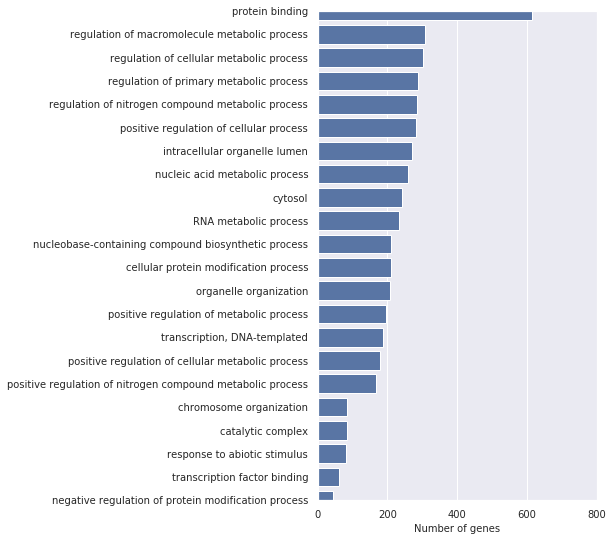

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (5,9))
sns.barplot(x='Count', y='GO_name', data=SDFO_GO_top, color='b')
sns.set(font_scale=2)
font_sz = 10

plt.xlabel("Number of genes", size=font_sz);
plt.ylabel('', size=font_sz);
plt.xlabel(ax.get_xlabel(), size=font_sz);
plt.yticks(ax.get_yticks(), size=font_sz);
plt.xticks(ax.get_xticks(), size=font_sz);


In [28]:
#list of all the important GO terms

imp_GOterms = SDFO_GO_informative['GO_name'].tolist()
#imp_GOterms

gene_list = []
for key in reverse_dict:
    gene_list.append(key)
    
#len(gene_list)

combined_gene_list = sum(gene_dict.values(), [])

count_gene = []
for i in range(0,len(gene_list)):
    count_gene.append(combined_gene_list.count(gene_list[i])) 

gene_GOterm_count = pd.DataFrame({'genes': gene_list, 'Count': count_gene})
gene_GOterm_count_sorted = gene_GOterm_count.sort_values(['Count'], ascending=False)

,genes,Count
6,CREBBP,461
382,PCBP3,447
128,CBX7,446
31,MEF2A,436
594,ZFP41,436
...,...,...
508,SSX2,31
517,SULT1A1,16
153,CLEC2D,15
253,HBA1,14


In [29]:
len(imp_GOterms)

22

In [43]:
reverse_df = pd.DataFrame(reverse_dict.items())
reverse_df = reverse_df.set_index(0)

In [45]:
reverse_df[1] = reverse_df[1].astype(str)

0
ADD1        ['transcription factor binding', 'protein bind...
ARHGEF2     ['transcription factor binding', 'protein bind...
ARID1A      ['transcription factor binding', 'DNA-binding ...
BBS1        ['transcription factor binding', 'DNA-binding ...
CNOT1       ['transcription factor binding', 'DNA-binding ...
                                  ...                        
RHCE        ['Factor: MAZ; motif: GGGMGGGGSSGGGGGGGGGGGG',...
SLC38A5     ['Factor: MAZ; motif: GGGMGGGGSSGGGGGGGGGGGG',...
SLC45A1     ['Factor: MAZ; motif: GGGMGGGGSSGGGGGGGGGGGG',...
TMEM221     ['Factor: MAZ; motif: GGGMGGGGSSGGGGGGGGGGGG',...
KIAA1257    ['Factor: ZF5; motif: GGSGCGCGS; match class: ...
Name: 1, Length: 758, dtype: object

GeneWalk method to identify GO terms

In [2]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3

python /data/reddylab/Alex/reddylab_utils/scripts/add_gene_symbol_to_df.py \
-ifile /data/reddylab/Revathy/dev/Tyler/grna.de.markers.all.filtered.unique_gene_symbols.txt \
-outfile /data/reddylab/Revathy/dev/Tyler/grna.de.markers.DEgenes.HGNCsymbol.txt \
-gene-id-to-symbol /data/gersbachlab/tsk10/HGNC_gene_names_ensembl_info.txt \
--gene-id-to-symbol-ix-id 0 \
-gene-id-to-symbol-format tsv


tail -n+2 /data/reddylab/Revathy/dev/Tyler/grna.de.markers.DEgenes.HGNCsymbol.txt \
| awk '$NF!="undef"{print $NF}' \
> /data/reddylab/Revathy/dev/Tyler/grna.de.markers.DEgenes.genewalk_symbols.txt



In [35]:
%%bash
mkdir -p /data/reddylab/Revathy/dev/Tyler/genewalk
source /data/reddylab/software/miniconda3/bin/activate alex_py3

sbatch --partition all \
    --mem 64G \
    --cpus-per-task 16 \
    -o /data/reddylab/Revathy/dev/Tyler/genewalk/genewalk.out \
    <<'EOF'
#!/bin/bash
genewalk --project genewalk_Tyler \
--genes /data/reddylab/Revathy/dev/Tyler/grna.de.markers.all.filtered.unique_gene_symbols.txt \
--id_type hgnc_symbol \
--stage all \
--base_folder /data/reddylab/Revathy/dev/Tyler/genewalk \
--network_source pc \
--nproc 16
EOF

Submitted batch job 24415158


In [127]:
import pandas as pd
import math
import numpy as np
from functools import reduce

d = {'col1': [1, 2, 3, 4], 'col2': [3, 4, 5, 6], 'col3': [1, 2, 1, 2]}
test = pd.DataFrame(data=d)

testList = test['col3'].tolist()
# pairs = map(lambda x: (int(x==1), int(x==2)), test['col3'])
# pair_list = list(pairs)
# pair_list

test['col3'].map(lambda x: (x==1)).value_counts()


True     2
False    2
Name: col3, dtype: int64

In [86]:
count

0     True
1    False
2     True
3    False
Name: col3, dtype: bool